In [1]:
import fitsio
import proplot as pplt
import numpy as np

In [13]:
import subprocess

subprocess.run(
    '''\
rm -f qadata*.fits && easyaccess --db desoper \
-c "select * from (\
 select qa.*, dbms_random.value as rnd from PIFF_HSM_MODEL_QA qa\
) r where r.rnd < 1.1; \
> qadata.fits"\
 ''',
    shell=True,
    check=True,
)

Connecting to DB ** desoper ** ...

Fetching data and saving it to qadata.fits ...

 Rows : 30000, Rows/sec: 46763 [0 Rows : 60000, Rows/sec: 46248 onnecting to DB ** desoper ** ...

Fetching data and saving it to qadata.fits ...

 Rows : 90000, Rows/sec: 48397 [0 Rows : 120000, Rows/sec: 50599 [ Rows : 150000, Rows/sec: 50406 [ Rows : 180000, Rows/sec: 50990 [ Rows : 210000, Rows/sec: 51278 [ Rows : 240000, Rows/sec: 51642 [ Rows : 270000, Rows/sec: 51699 [ Rows : 300000, Rows/sec: 51198 [ Rows : 330000, Rows/sec: 51344 [ Rows : 360000, Rows/sec: 51809 [ Rows : 390000, Rows/sec: 52220 [ Rows : 420000, Rows/sec: 52826 [ Rows : 450000, Rows/sec: 53481 [ Rows : 480000, Rows/sec: 53945 [ Rows : 510000, Rows/sec: 53486 [ Rows : 540000, Rows/sec: 53883 [ Rows : 570000, Rows/sec: 54407 [ Rows : 600000, Rows/sec: 54633 [ Rows : 630000, Rows/sec: 54952 [ Rows : 660000, Rows/sec: 55139 [ Rows : 690000, Rows/sec: 55280 [ Rows : 720000, Rows/sec: 55315 [ Rows : 750000, Rows

OSError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
qadata.fits


In [14]:
import glob

fnames = glob.glob("qadata*.fits")
dall = [fitsio.read(f, lower=True) for f in fnames]
dall = np.hstack(dall)
dall.dtype.names

('filename',
 'pfw_attempt_id',
 'expnum',
 'ccdnum',
 'star_t_mean',
 'star_t_std',
 'nstar',
 'flag',
 'fwhm_cen',
 'exp_star_t_mean',
 'exp_star_t_std',
 'rnd')

In [15]:
d = dall[(dall["flag"] == 0) & (dall["nstar"] >= 30)]

exposure cut: 4.269293575404051e-05
star T cut: 3.8441357089737716e-05
fwhm_cen cut: 0.0


Text(0.5, 1.0, 'cut: 0.000%')

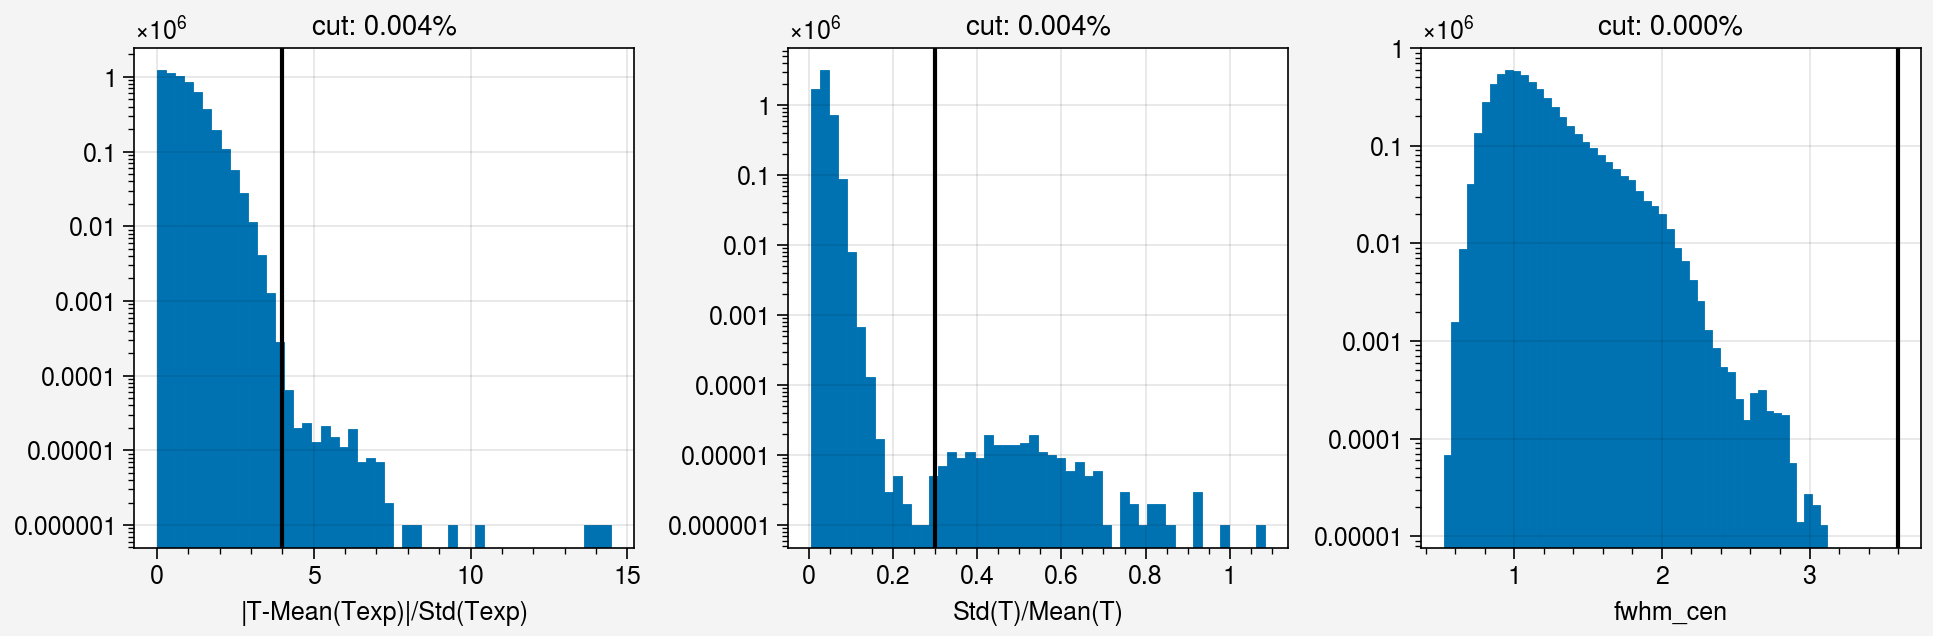

In [16]:
fig, axs = pplt.subplots(nrows=1, ncols=3, share=0)

ax = axs[0]
ax.hist(
    np.abs(d["star_t_mean"] - d["exp_star_t_mean"])/d["exp_star_t_std"],
    bins=50,
    log=True
);
ax.set_xlabel("|T-Mean(Texp)|/Std(Texp)")
ax.axvline(4, color="k")
frac = np.mean(np.abs(d["star_t_mean"] - d["exp_star_t_mean"])/d["exp_star_t_std"] > 4)
print("exposure cut:", frac)
ax.set_title("cut: %0.3f%%" % (frac*100))

ax = axs[1]
ax.hist(
    d["star_t_std"]/d["star_t_mean"],
    bins=50,
    log=True
);
frac = np.mean(d["star_t_std"]/d["star_t_mean"] >= 0.3)
print("star T cut:", frac)
ax.set_xlabel("Std(T)/Mean(T)")
ax.axvline(0.3, color="k")
ax.set_title("cut: %0.3f%%" % (frac*100))

ax = axs[2]
ax.hist(
    d["fwhm_cen"],
    bins=50,
    log=True
);
frac = np.mean(d["fwhm_cen"] > 3.6)
print("fwhm_cen cut:", frac)
ax.set_xlabel("fwhm_cen")
ax.axvline(3.6, color="k")
ax.set_title("cut: %0.3f%%" % (frac*100))
